## Spēles cirks analīze

### Ievads
Cirks ir galda spēle, kas radusies 19.gs. beigās kā spēles "Snakes and ladders" variants. Spēlē pa numurētiem lauciņiem pārvieto kauliņus, atbilstoši ar metamo kauliņu uzmestajam punktu skaitam.   
https://lv.wikipedia.org/wiki/Cirks_%28sp%C4%93le%29  
https://en.wikipedia.org/wiki/Snakes_and_ladders  

Metaamajam kauliņam ir 6 skaldnes, uz tām ir punkti no 1 līdz 6. Sākotnēji visu spēlētāju kauliņi tiek novietoti uz pirmā lauciņa (numurs 1). Uzmetot noteiktu punktu skaitu, kauliņš jāpārvieto lauciņu numuru pieaugšanas secībā par uzmesto punktu skaitu. Nonākot dažos no lauciņiem, kuros ir doti zīmējumi, kas raksturo kustību, jāpārvietojas atbilstoši zīmējuma kustībai. Šāda pārvietošanās var būt gan strauji numuru pieaugšanas secībā (uz augšu), gan arī numur samazināšanās secībā (uz leju). Lai vieglāk atšķirtu šādus lauciņus, tos dažkārt iezīmē ar krāsām (piemēram citējot [spēles noteikumus](https://www.zvaigzne.lv/lv/gramatas/apraksts/26340-spele_cirks.html) "ja figūra apstājas uz lauciņa ar sarkano ciparu, tā jāpārvieto kustības virzienā uz lauciņu ar zilo ciparu"). Šādus pārvietojumus turpmāk sauksim par *lēcieniem*. Turpinoties spēlei, uzvar tas spēlētājs, kas pirmais nonāk pedējā lauciņā (*finiša* lauciņš ar vislielāko numuru). Lauciņu skaits spēles galdiņā var būt dažāds atkarībā no konkrētā varianta. Atkarībā no spēles varianta var būt dažādi finiša nosacījumi, piemēram, 
1. Kauliņam precīzi jānonāk *finiša* lauciņā. Ja uzmests vairāk atlikušie uzmestie punkti jāiet atpakaļ virzienā (sauksim to *variants atstarošanās*)
2. Kauliņam precīzi jānonāk *finiša* lauciņā. Ja uzmests vairāk, kauliņam jāpaliek esošajā lauciņā (*variants gaidīšana*)
3. Finišs tiek sasniegts kauliņam nonākot *finiša* lauciņā vai to šķērsojot (*variants finiša līnija*)


Šajā uzdevumā aplūkosim galdiņu ar 120 lauciņiem, tie sakārtoti rindās pa 10. Pamata analīzē lietosim spēles galdiņu no https://www.zvaigzne.lv/lv/gramatas/apraksts/26340-spele_cirks.html



### Uzdevuma nostādne

Izvēlēto galdiņu formāli raksturosim ar lauciņu skaitu un ar lēcienu sarakstu.  Vienmēr pieņemsim, ka starta lauciņš ir ar numuru 1, bet finiša lauciņš ar maksimālo numuru. Analīzē pielietosim dažādus finiša nosacījumus.  Metamo kauliņu raksturosim ar tā skaldņu skaitu. Pieņemsim, katrā skaldnē ir skaitļi no 1 līdz skaldņu skaitam un ka katra skaldne var uzkrist ar vienādu varbūtību (=1/skaldņu skaits)

Pamatuzdevums ir noskaidrot, kāds ir finiša sasniegšanai nepieciešamo gājienu skaita statistiskais sadalījums. Papildus noskaidrosim arī, cik vidēji kurš no lauciņiem tiek apmeklēts pirms finiša sasniegšanas. Novērtēsim arī lēcienu biežumu.

### Risināšanas metodes  

Pirmajā daļā veiksim uzdevuma risināšanu veidojot spēles *modeli*. Tas ļaus izspēlēt daudzus variantus un iegūt spēles gājienu skaita sadalījumu no *skaitliskajiem eksperimentiem*. Skaitliski uzskaitīsim arī lauciņu apmeklējumus un lēcienus.

Otrajā daļā, ņemot vērā, ka spēles gaitu var aprakstīt ar *Markova ķēdi*, izveidosim pārejas varbūtību matricu. Tas ļaus noteikt varbūtību, ar kādu pēc noteikta gājienu skaita tiks sasniegts finišs. Salīdzināsim šo rezultātu ar pirmajā daļā iegūto. Pārejas varbūtību matrica ļaus arī noteikt vidējo apmeklēto lauciņu skaitu.

## Risinājums

### Python bibliotēku inicializācija

In [82]:
import matplotlib
import matplotlib.pyplot as plt
import sys, os, datetime, glob, numpy, pandas
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
matplotlib.rc('font', family='Arial')
from __future__ import unicode_literals
matplotlib.rcParams.update({'font.size': 24})
from IPython.display import HTML

### Ieejas parametri
```n_cells``` - kopējais lauciņu skaits  
```n_dice_sides``` - metamā kauliņa skaldņu skaits

Lēcienu sarakstu ielasām no faila. Failā jābūt divām kolonām ar lauciņu numuriem (numerācija no 1!) - pirmajā kolonā (*No*) lēciena sākuma lauciņa numurs, otrajā (*Uz*) - attiecīgā lēciena beigu lauciņa numurs. Failā lauciņu numerāciju jāievada sākot no 1. Darbā, savukārt, lietosim numerāciju no 0

In [18]:
# kopējais lauciņu skaits
n_cells = 120
# metamā kauliņa šķautņu skaits
n_dice_faces = 6
# lēcienu faila nosaukums
fn_jumps = 'jumps.txt'

In [15]:
# lēcieni - numerācija no 1!!
df_jumps = pd.read_csv(fn_jumps, sep='\t')
HTML(df_jumps.T.to_html())
# pārliekam numerāciju sākot no 0
df_jumps = df_jumps - 1

### Aprēķins ar vairāku skaitlisku spēļu izspēli
Izveidosim Python klasi *Cirks*, kurā ievadīsim ieejas parametrus. Izveidosim klases ietvaros funkciju, kas "izspēlē" vienu spēli *one_game*
Kauliņa mešanu simulēsim ar *numpy.random.randint* funkciju, kas atgriež gadījuma veselus skaitļus robežās no 1 līdz kauliņa skaldņu skaitam. Lai palielinātu šīs funkcijas ātrdarbību ieviesīsim gadījuma skaitļu buferi (klase *RandomBuffer*), kas uzreiz ģenerē vairākus gadījuma skaitļus uz pēc pieprasījuma (*get_rand*) tos atgriež pa vienam

In [30]:

class RandomBuffer:
    """ Gadījumu skaitļu buferis"""
    def __init__(self, dice_faces = 6, random_chunk = 100):
        """ 
        dice_faces - skaldņu skaits
        random_chunk - bufera garums
        """
        self.dice_faces = dice_faces
        self.chunksize = random_chunk
        self.get_rand_chunk()        
    def get_rand_chunk(self):
        """ Piepilda buferi ar chunksize gadījuma skaitļiem"""
        self.ichunk = 0
        self.rand = np.random.randint(1,self.dice_faces+1, size=self.chunksize)
    def get_rand(self):
        """Atgriež vienu veselu gadījumu skaitli no 1 līdz skaldņu skaitam (dice_faces)"""
        if (self.ichunk>=self.chunksize):
            self.get_rand_chunk()
        r = self.rand[self.ichunk]
        self.ichunk+=1 
        return r
# testi    
def test_random_buffer():
    rand = RandomBuffer(n_dice_faces)
    arr = []
    for i in range(150):
        arr.append(rand.get_rand())
    print(arr)
        
test_random_buffer()        

[6, 3, 5, 6, 3, 2, 4, 2, 4, 4, 3, 1, 6, 1, 6, 6, 5, 1, 1, 6, 5, 5, 2, 2, 3, 6, 1, 6, 1, 4, 2, 3, 5, 1, 1, 1, 3, 6, 3, 3, 3, 3, 3, 5, 4, 3, 6, 2, 5, 6, 6, 1, 5, 3, 5, 3, 2, 6, 1, 3, 3, 6, 5, 4, 5, 3, 5, 3, 2, 2, 1, 3, 6, 4, 6, 5, 5, 4, 2, 5, 6, 2, 6, 4, 4, 4, 3, 6, 4, 6, 1, 5, 2, 1, 4, 1, 4, 1, 1, 2, 1, 6, 6, 4, 1, 3, 4, 6, 4, 2, 5, 6, 6, 5, 1, 4, 4, 2, 4, 2, 5, 3, 2, 4, 4, 6, 4, 4, 1, 2, 6, 6, 4, 2, 5, 4, 6, 1, 3, 5, 1, 3, 3, 6, 6, 3, 4, 6, 2, 5]


#### Tests randint ātrdarbībai
Pievienoti testi *randint* funkcijas ātrdarbībai atkarībā no atgriežamo gadījuma skaitļu skaita

In [27]:
print('Viens skaitlis')
%timeit np.random.randint(1,n_dice_faces+1, size=1)
print('100 skaitļi')
%timeit np.random.randint(1,n_dice_faces+1, size=100)
print('10000 skaitļi')
%timeit np.random.randint(1,n_dice_faces+1, size=10000)

Viens skaitlis
7.23 µs ± 23.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
100 skaitļi
7.95 µs ± 10.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10000 skaitļi
77.5 µs ± 527 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Klase Cirks
klases funkcija *one_game* iszpēlē vienu partiju, atgriež spēles soļu skaitu un apmeklēto lauciņu statistiku

In [241]:
class Cirks:
    finish_type_names={1:'Atstarošanās',2:'Gaidīšana',3:'Finiša līnija'}
    """Cirka spēles skaitliskais modelis"""
    def __init__(self, jumps, n_cells = 120, dice_faces = 6):
        """Inicializācija
        jumps - lecienu saraksts tuple masīva formā [(no,uz),(no,uz)...]
        n_cells - šūnu skaits
        dice_faces - metamā kauliņa skaldņu skaits
        """
        self.n_cells = n_cells
        self.dice_faces = dice_faces
        # pārveidojam lēcienu masīvu par masīvu lecieni, kur katram lauciņam ir piešķirts lauciņa numurs, uz kuru jālec
        # lauciņiem bez lēciena masīvs saturēs pašu lauciņa numuru
        self.lecieni=np.arange(n_cells)        
        self.lecieni[jumps[:,0]]=jumps[:,1]
        self.rand = RandomBuffer()
        # drošības (pretuzkāršanās) parametrs - maksimālais gājienu skaits
        self.max_steps  = 10000

    def finish_1(self, ipos_previous, ipos_next):
        """finiša nosacījums - atstarošanās"""
        """ipos_previous - no kura lauciņa nākam"""
        """ipos_next - uz kuru lauciņu nonākam"""
        """funkcija atgriež jauno lauciņa numuru"""        
        # ja esam pārgājuši pāri, tad atstarojamies
        ipos = ipos_next if ipos_next <= self.n_cells - 1 else self.n_cells -1  - (ipos_next - (self.n_cells -1))
        return ipos

        
    def finish_2(self, ipos_previous, ipos_next):
        """finiša nosacījums - gaidīšana"""
        """ipos_previous - no kura lauciņa nākam"""
        """ipos_next - uz kuru lauciņu nonākam"""
        """funkcija atgriež jauno lauciņa numuru"""        
        # ja esam pārgājuši pāri, tad paliekam uz vietas
        ipos = ipos_next if ipos_next <= self.n_cells -1 else ipos_previous
        return  ipos
    
    def finish_3(self, ipos_previous, ipos_next):
        """finiša nosacījums - finiša līnija"""
        """ipos_previous - no kura lauciņa nākam"""
        """ipos_next - uz kuru lauciņu nonākam"""
        """funkcija atgriež jauno lauciņa numuru"""        
        # ja esam šķērsojuši finiša līniju - esam uz tālakiem fiktīviem laucīņiem
        return ipos_next
    
    def one_game(self, finish_type):
        """Vienas spēles simulācija"""
        # uzstādam finiša noteikšanas funkciju
        if finish_type == 1:
            finish_func = self.finish_1
        elif finish_type == 2:
            finish_func = self.finish_2
        elif finish_type == 3:
            finish_func = self.finish_3
        else:
            raise "Nepareizs finiša tips"
            
                        
        # istep - gājiena numurs pēc kārtas
        istep=0
        # ipos - lauciņš, uz kura atrodamies
        ipos=0        
        # visits - apmeklējumu skaits šūnās
        visits = np.zeros(shape=self.n_cells, dtype=int)
        visits[ipos]=visits[ipos]+1
        while istep<self.max_steps:
            # gājiens
            ipos_new = ipos+self.rand.get_rand()
            # gājiena numurs + 1 
            istep+=1
            # spēlesfiniša nosacījumi
            ipos = finish_func(ipos, ipos_new)
            is_finished = ipos >= self.n_cells -1 
            if is_finished:
                break
            #ipos = ipos_new
            # apmeklējumu statistiku pieskaitām pirms lēciena, lai varētu uzskaitīt lēcienus            
            visits[ipos]=visits[ipos]+1                
            # pārvietojamies uz lauciņu ar lēcienu, ja tāds ir
            ipos=self.lecieni[ipos]    
        return istep, visits    


#### Klases Testi

In [151]:
# pārveidojam lēcienu datus formā [(no,uz),(no,uz)...]
lecienu_saraksts = np.array(list(df_jumps.itertuples(index=False, name=None)))
c = Cirks(lecienu_saraksts)
for ftype in [1,2,3]:
    count, visits = c.one_game(ftype)
    print(Cirks.finish_type_names[ftype], count)


Atstarošanās 49
Gaidīšana 33
Finiša līnija 31


### Skaitliskie eksperimenti
Veiksim lielu skaitu izspēļu ar sagatavotu spēles skaitlisko modeli. Izveidojam fukciju *get_moves_distribution*, kas izspēlē noteiktu spēļu skaitu (*samplecount*) un atgriež masīvu ar gājienu skaitu katrai no šīm spēlēm un masīvu ar apmeklējumu skaitu katram no lauciņiem katrai spēlei

In [242]:
def get_moves_distribution(game, finish_type, samplecount, progress = 10000):
    move_counts = []
    total_visits = []
    for i in range(samplecount):
        c, v = game.one_game(finish_type)    
        move_counts.append(c)
        total_visits.append(v)
        if i % progress == 0 and i!=0:
            print('Izspēlētas ', i)
        
    #move_counts = [self.one_game() for i in range(samplecount)]    
    return np.array(move_counts), np.array(total_visits)


#### Ātrdarbības pārbaude

In [155]:
# pārveidojam lēcienu datus formā [(no,uz),(no,uz)...]
lecienu_saraksts = np.array(list(df_jumps.itertuples(index=False, name=None)))-1
c = Cirks(lecienu_saraksts)
%timeit get_moves_distribution(c, 3, 1000)

52.9 ms ± 872 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Izspēles, katram no finiša tipiem

In [262]:
samplecount = 100000

In [ ]:
# pārveidojam lēcienu datus formā [(no,uz),(no,uz)...]
lecienu_saraksts = np.array(list(df_jumps.itertuples(index=False, name=None)))
c = Cirks(lecienu_saraksts)
results = {}
for ftype in [1,2,3]:
    print('Finiša tips', Cirks.finish_type_names[ftype])
    counts, visits = get_moves_distribution(c, ftype, samplecount)
    results[ftype] = (counts, visits)

In [263]:
# noglabājam
#import pickle
#with open('results.pickle','wb') as f:
#    pickle.dump(results, f)
#with open('results.pickle','rb') as f:
#    results=pickle.load(f)

#### Gājienu skaita histogrammas
Izveidosim katram no finiša tipiem sadalījuma līkni (histogrammu) pa gājienu skaitu. Aprēķināsim, cik procentos gadījumu spēli var izspēlēt ar katru no gājienu skaitiem. *np.bincount* funkcija saskaita katram gājienu skaitam, cik reizes mūsu skaitliskajā eksperimentā ir bijis šāds gājienu skaits. Lai to izteiktu relatīvajās daļās to jāizdala ar kopējo spēļu skaitu

In [246]:
fractions = {}
for ftype in [1,2,3]:
    samples = results[ftype][0]
    fractions[ftype] = np.bincount(samples)/len(samples)

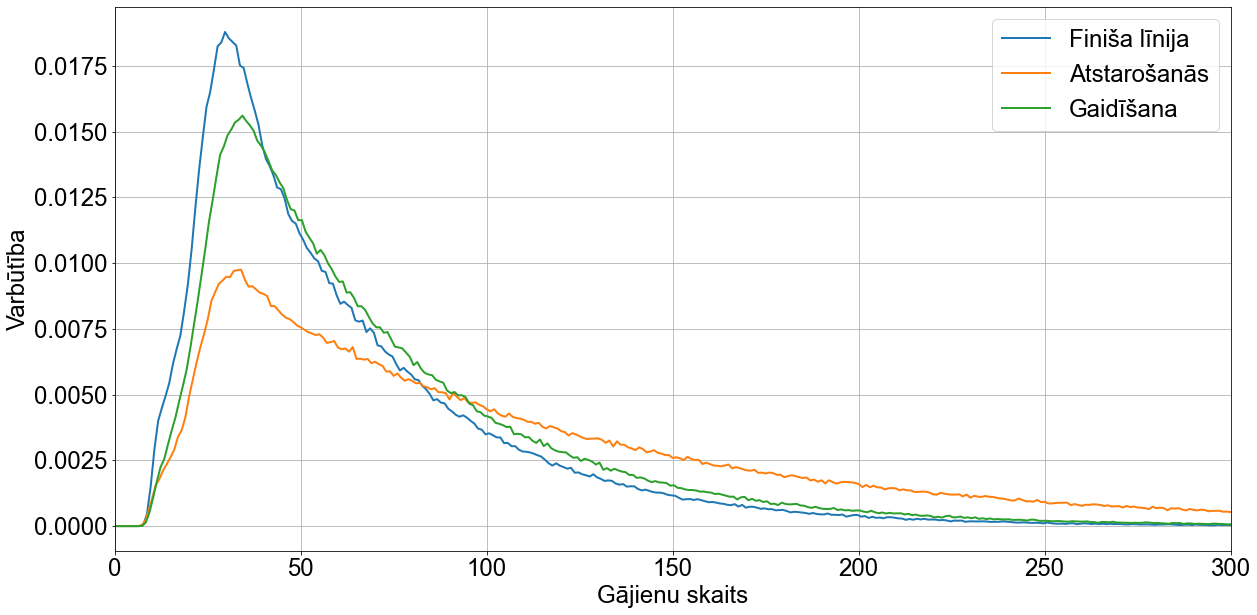

In [260]:
fig, ax=plt.subplots(figsize=(20,10))
for ftype in [3,1,2]:
    ax.plot(np.arange(0,len(fractions[ftype]))+(ftype-1)/3,fractions[ftype], label=Cirks.finish_type_names[ftype], 
           lw=2, )
            #width=0.5)
ax.grid()
ax.set_xlim(0,300)
ax.set_xlabel('Gājienu skaits')
ax.set_ylabel('Varbūtība')
ax.legend(loc='best')
#fig.savefig('varbutiba_skaitliski.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### Kumulatīvās varbūtības līknes
Izveidosim kumulatīvās varbūtības līknes katram variantam. Tās norādīs, cik procentos gadījumu spēli var izspēlēt ar mazāku vai vienādu gājienu skaitu katram no iespējamajiem gājienu skaitiem.

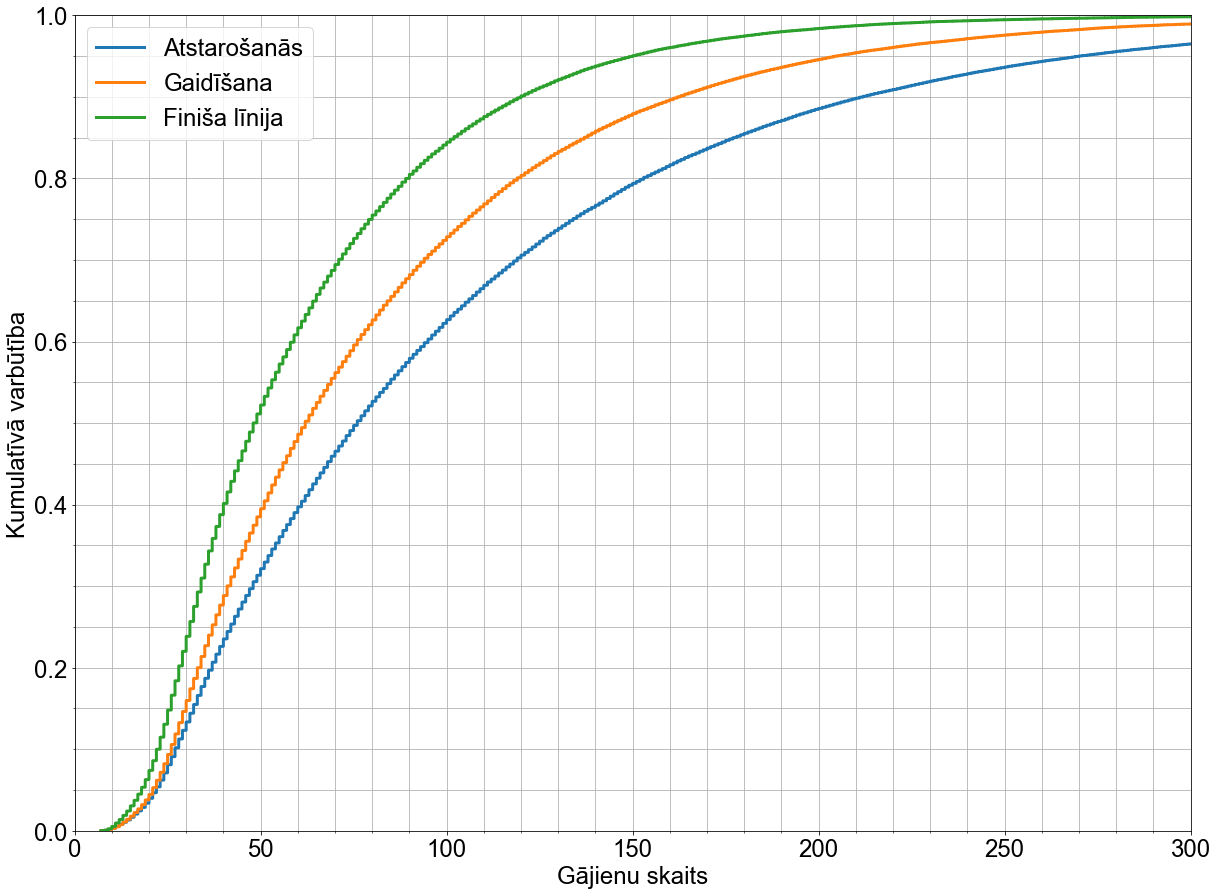

In [261]:
fig, ax=plt.subplots(figsize=(20,15))
for ftype in [1,2,3]:
    samples = results[ftype][0]
    samples_sorted=np.sort(samples)
    prob=(np.arange(len(samples))+1)/(len(samples)+1)
    ax.plot(samples_sorted,prob, lw=3, label=Cirks.finish_type_names[ftype],)
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.grid()
ax.grid(which='minor')
ax.set_xlim(0,300)
ax.set_ylim(0,1)
ax.set_xlabel('Gājienu skaits')
ax.set_ylabel('Kumulatīvā varbūtība')
ax.legend(loc='best')
fig.savefig('kumvarbutiba_skaitliski.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### Statistika

In [250]:
stats={}
for ftype in [1,2,3]:
    stype = Cirks.finish_type_names[ftype]
    stats[stype]={}
    stats[stype]['Vidēji'] = results[ftype][0].mean()
    stats[stype]['Mediāna'] = np.median(results[ftype][0])
    stats[stype]['25%'] = np.percentile(results[ftype][0], 25)
    stats[stype]['75%'] = np.percentile(results[ftype][0], 75)
    stats[stype]['90%'] = np.percentile(results[ftype][0], 90)
    
stats = pd.DataFrame(stats)

In [251]:
HTML(stats.to_html(float_format='%.2f'))

,Atstarošanās,Gaidīšana,Finiša līnija
Vidēji,113.56,71.37,61.90
Mediāna,85.00,57.00,48.00
25%,46.00,36.00,31.00
75%,150.00,91.00,79.00
90%,237.00,137.00,120.00


## Risinājums ar Markova ķēdes palīdzību
https://en.wikipedia.org/wiki/Absorbing_Markov_chain

Spēli var uzskatīt par gadījuma procesu, kurā mainīgie ir varbūtības atrasties katrā no lauciņiem. Pirmajā solī varbūtība ir 1 pirmajā lauciņā un 0 visos pārējos. Katrā nākamajā solī atbilstoši tiek izrēķinātas varbūtības atrasties katrā no lauciņiem pareizinot iepriekšējā soļa varbūtības ar pārejas varbūtību matricu. Šāda matrica rāda pārejas varbūtību starp lauciņiem atbilstoši metamā kauliņa īpašībām un lēcienu sarakstam.
Uzstādītās problēmas atrisinājums tad ir varbūtība atrasties finiša lauciņā. To var salīdzināt ar iepriekšējā metodē ar skaitliskajiem eksperimentiem noteikto kumulatīvās varbūtības līkni

### Pārejas varbūtības matrica
Lietojam  kvadrātisku matricu $T_{ij}$ ar rindu un kolonu skaitu, kas sakrīt ar lauciņu skaitu  
Rindas (indekss $i$) norādīs no kuras šūnas, kolonas (indekss $j$) uz kuru šūnu  
Pieņemsim, ka metamais kauliņš ir ar vienādu varbūtību uz katras skaldnes  
Sākotnējoi katrā rindā aizpilda varbūtību pāriet uz secīgiem lauciņiem atbilstoši katram no iespējamajiem uzmestajiem kauliņa numuriem. Tad ņem vērā lēcienus. Lauciņi, no kuriem lec, šajā matricā ir neaktīvi (bet to atstājam), mākslīgi tur ieliksim nulles varbūtības jebkādā pārejām

In [216]:

def get_transition_matrix(jumps, finish_type, n_cells = n_cells, n_dice_sides = n_dice_sides):
    # pārveidojam lēcienu masīvu par masīvu lecieni, kur katram lauciņam ir piešķirts lauciņa numurs, uz kuru jālec
    # lauciņiem bez lēciena masīvs saturēs pašu lauciņa numuru
    lecieni=np.arange(n_cells)        
    lecieni[jumps[:,0]]=jumps[:,1]
    transition_matrix = np.zeros(shape=(n_cells,n_cells))
    # metamā kauliņa skaitļu varbūtības, šeit vienādas
    dice_probabilities = np.ones(shape=n_dice_sides)/n_dice_sides
    # katram lauciņam
    for i in range(0, n_cells):
        # uz kurieni var aiziet ar metamā kauliņa skaitiem no lauciņa i
        # masīvs gajieni satur lauciņu nomurus, no kuriem var aiziet uzmetot katru no metamā kauliņa skatļiem
        # sākotnēji -> var aiziet uz i+1, i+2, ... i+Sk -> gajieni[0] = i+1,.. gajieni[n_dice_sides] = i + n_dice_sides
        gajieni = np.arange(1,n_dice_sides + 1) + i
        # finiša nosacījumi
        if finish_type == 1:
            # atstarošanās
            gajieni[gajieni>n_cells-1] = n_cells - 1 - ( gajieni[gajieni>n_cells-1] - (n_cells - 1))
        elif finish_type == 2:
            # gaidīšana
            gajieni[gajieni>n_cells-1] = i
        elif finish_type == 3:
            # bez atstarošanās - visi gājieni, kas pārsniedz finišu ir uz finišu
            gajieni[gajieni>n_cells-1]=n_cells-1
        else:
            raise "Nepareiz finiša nosacījumu tips"
        # katram no gajieniem pielietojam atbilstošo lēcienu
        gajieni = lecieni[gajieni]
        # pieskaitām pārejas varbūtības attiecīgajam masīva elementam Tij, kur j=gajieni
        np.add.at(transition_matrix[i], gajieni, dice_probabilities)
        
    # aizpildām ar nullēm lauciņu pārejas varbūtības tiem no kuriem lec    
    transition_matrix[jumps[:,0]] = 0.0
    # finiša lauciņš pāriet ar varbūtību 1 pat uz sevi
    transition_matrix[n_cells-1] = 0.0
    transition_matrix[n_cells-1, n_cells-1] = 1.0
    
    return transition_matrix

In [237]:
# pārveidojam lēcienu datus formā [(no,uz),(no,uz)...]
jumps = np.array(list(df_jumps.itertuples(index=False, name=None)))


#### Uzzīmējam pārejas varbūtību matricas

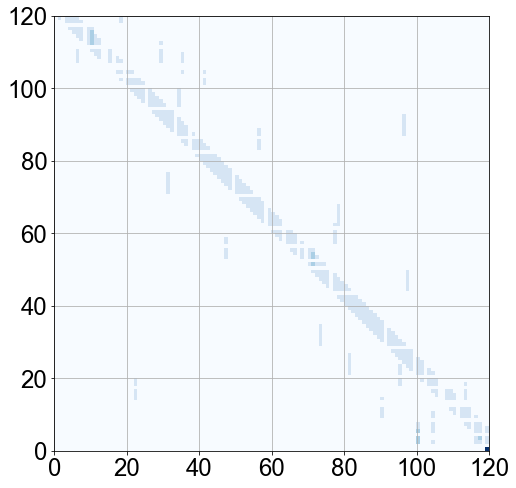

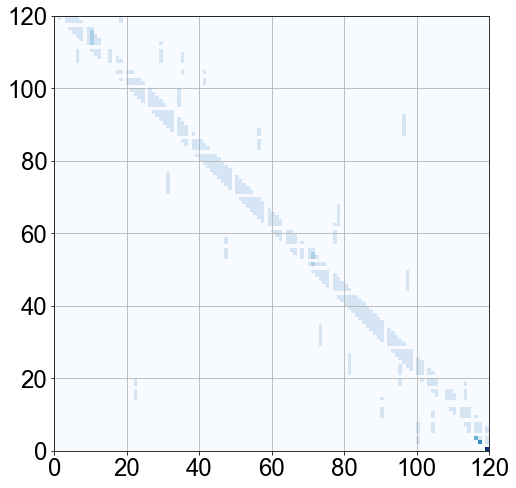

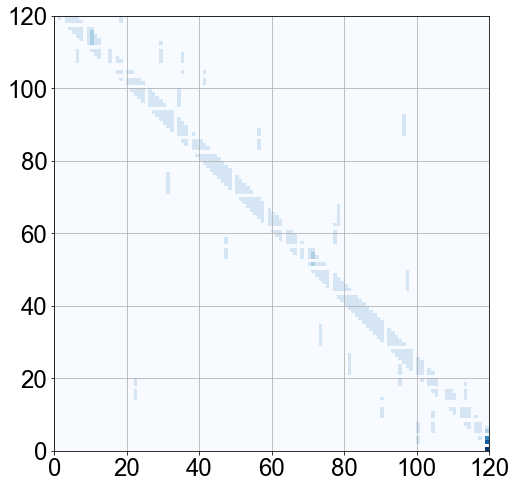

In [232]:
for ftype in [1,2,3]:
    transition_matrix = get_transition_matrix(jumps, ftype)
    fig, ax=plt.subplots(figsize=(8,8))
    ax.set_aspect(1.0)
    ax.imshow(transition_matrix, cmap = 'Blues', extent=(0, n_cells, 0.0, n_cells), aspect=1.0)
    ax.grid()
    ax.set_xlim(0, n_cells)
    ax.set_ylim(0, n_cells)
    plt.show()

### Varbūtība sasniegt finišu pēc noteikta soļu skaita
Raksturosim varbūtību atrasties kādā lauciņā  ($j$) ar $p_j$. Apzīmēsim ar $p_j(n)$ šo varbūtību gājienā ar numuru $n$. Tad varbūtība nākošā gājienā ir varbūtības vektora un pārejas varbūtību matricas reizinājums: $ p_j(n+1) = p_i(n) T_{ij}$. Šāda sakarība summē pāreju varbūtības uz lauciņu $j$ no visiem citiem lauciņiem atbilstoši pāreju varbūtībām un varbūtībām iepriekšējā solī

In [235]:
# izveidojam funkciju
def calculate_probabilities(transition_matrix, max_number_of_steps = 300):
    # sākotnējā varbūtība
    initial = np.zeros(shape=transition_matrix.shape[0])
    initial[0]=1.0
    probability_vector = initial
# masīvs, kur uzkrāsim varbūtības katrā solī
    probabilities= [probability_vector]

    for n in range(max_number_of_steps):
        # varbūtibas vektora un pārejas varbūtību matricas reizinājums
        # @ operators numpy - matricu reizinājums
        probability_vector = probability_vector @ transition_matrix
        # uzkrājam varbūtību vektorus
        probabilities.append(probability_vector)
    probabilities=np.array(probabilities)
    return probabilities

In [239]:
probabilities = {}
for ftype in [1,2,3]:
    transition_matrix = get_transition_matrix(jumps, ftype)
    probabilities[ftype] = calculate_probabilities(transition_matrix)

In [234]:
# izveidojam funkciju
def calculate_probabilities(transition_matrix):
    # sākotnējā varbūtība
    initial = np.zeros(shape=transition_matrix.shape[0])
    initial[0]=1.0
# kumulatīvā varbūtība atkarībā no soļu skaita
cumulative_probability = [0]
# maksimālais aprēķinu gājienu skaits
max_number_of_steps = 300
probability_vector = initial
# masīvs, kur uzkrāsim varbūtības katrā solī
probabilities= [probability_vector]

for n in range(max_number_of_steps):
    # varbūtibas vektora un pārjas varbūtību matricas reizinājums
    probability_vector = probability_vector @ transition_matrix
    # varbūtība atrasties finiša lauciņā
    probability_of_finish = probability_vector[transition_matrix.shape[0]-1]
    # uzkrājam varbūtību vektorus
    probabilities.append(probability_vector)
    # uzkrājam finiša varbūtības
    cumulative_probability.append(probability_of_finish)
probabilities=np.array(probabilities)

#### Kumulatīvās varbūtības grafiks, salīdzinājums ar skaitlisko eksperimentu

In [255]:
xx=ll[0]
xx.lineStyles.c

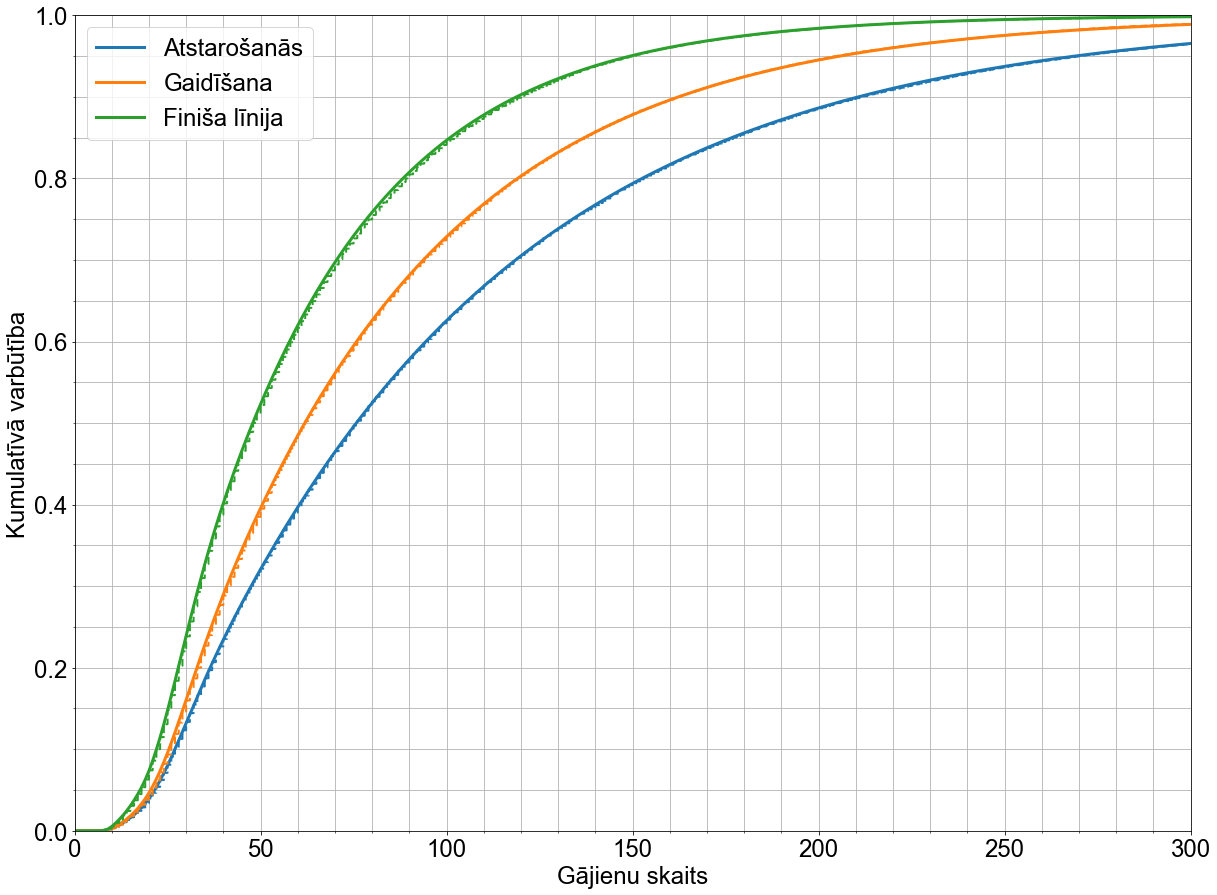

In [266]:
#samples_sorted2=np.sort(samples_bezatstar)
#prob2=(np.arange(len(samples_bezatstar))+1)/(len(samples_bezatstar)+1)

fig, ax=plt.subplots(figsize=(20,15))
#ax.plot(samples_sorted2,prob2, lw=2, label='Bez atstarošanās')
for ftype in [1,2,3]:
    cumulative_probability = probabilities[ftype][:, n_cells - 1]
    ll= ax.plot(np.arange(len(cumulative_probability)),cumulative_probability, lw=3, label=Cirks.finish_type_names[ftype])

    samples = results[ftype][0]
    samples_sorted=np.sort(samples)
    prob=(np.arange(len(samples))+1)/(len(samples)+1)
    ax.plot(samples_sorted,prob, lw=2, ls='--', color= ll[0].get_color())

#ax.yaxis.set_major_locator(matplotlib.ticker.LinearLocator())
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.grid()
ax.grid(which='minor')
ax.set_xlim(0,300)
ax.set_ylim(0,1)
ax.set_xlabel('Gājienu skaits')
ax.set_ylabel('Kumulatīvā varbūtība')
ax.legend(loc='best')

ax.legend(loc='best')
fig.savefig('kumvarbutiba_markovakede.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Varbūtība atrasties noteiktā šūnā pec noteikta gājienu skaita
Grafikus uzzīmējam no aprēķinātajā varbūtībām, izkārtojot tās pa kolonām katrā laika solī. Grafiki norāda varbūtību atrasties kādā no šūnām pec noteikta gājienu skaita. Augšējā rindā ir finiša šūna

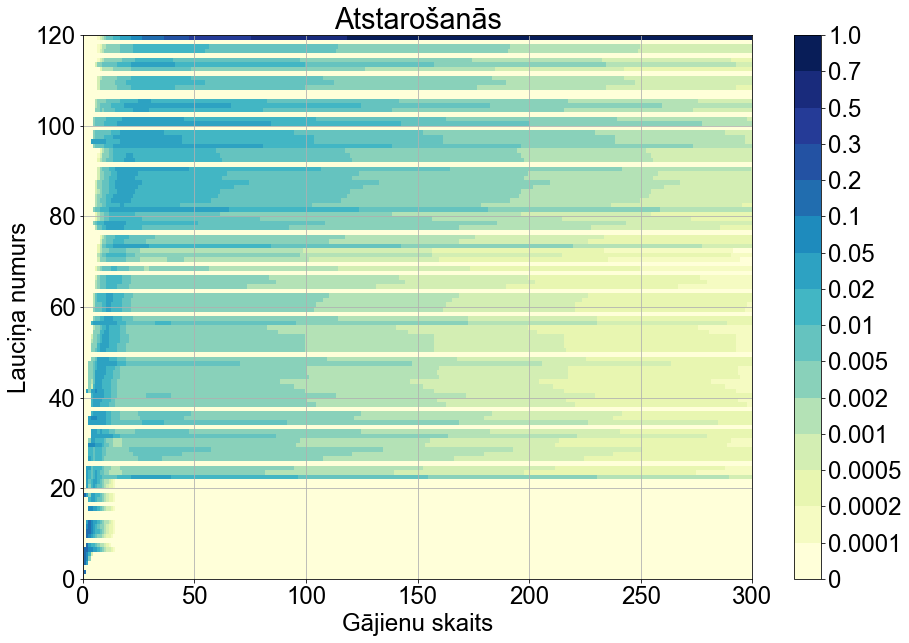

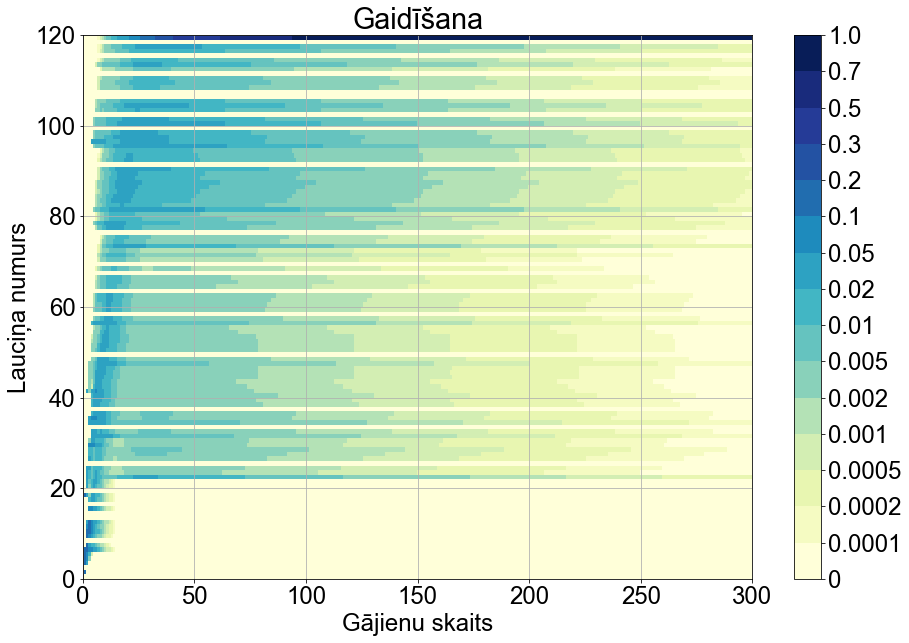

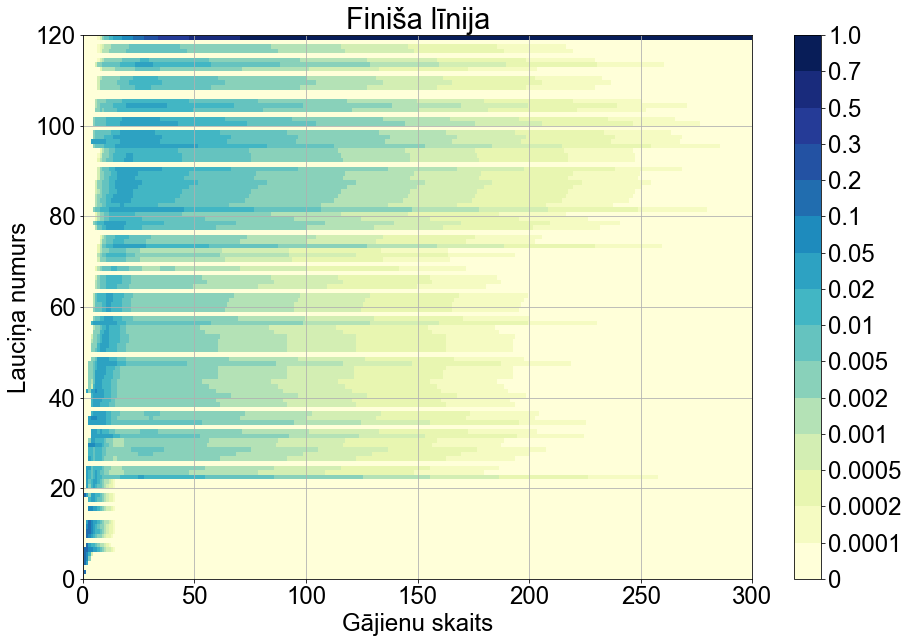

In [290]:
max_number_of_steps = 300
levels = [0,1e-4,2e-4,5e-4,0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7,1.0]
for ftype in [1,2,3]:
    fig, ax=plt.subplots(figsize=(15,10))
    cmap = matplotlib.cm.YlGnBu
    norm = matplotlib.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    cs =ax.pcolormesh(np.arange(max_number_of_steps+1),np.arange(n_cells)+0.5, probabilities[ftype].T,
                    norm=norm, cmap=cmap)
    
    cbar = fig.colorbar(cs,norm=norm, cmap=cmap)
    cbar.ax.set_yticks(levels)
    cbar.ax.set_yticklabels([f'{c}' for c in levels])
    
    ax.set_xlabel('Gājienu skaits')
    ax.set_ylabel('Lauciņa numurs')
    ax.set_ylim(0, n_cells)
    ax.grid()
    ax.set_xlim(0,max_number_of_steps)
    ax.set_title(Cirks.finish_type_names[ftype])
    plt.show()

### Vidējais šūnu skaits, ko apmeklē pirms sasniedz finišu.
https://en.wikipedia.org/wiki/Absorbing_Markov_chain#Expected_number_of_visits_to_a_transient_state  
Fundamentālā matrica $N_{ij}$ norāda šūnas $j$ apmeklējumu skaitu, ja sākums ir šūnā $i$:
$N_{ij} = (\delta_{ij} - Q_{ij})^{-1}$

Spēlei aprēķināsim spēles laikā vidēji apmeklēto šūnu skaitu, ja $i=0$, $N_{0j}$



In [293]:
# martrica neiekļaujot finiša šūnu
nv = np.linalg.inv(np.identity(transition_matrix.shape[0]-1)-transition_matrix[:-1,:-1])

In [297]:
nv[0]

array([1.        , 0.16666667, 0.        , 0.19444444, 0.22685185,
       0.26466049, 0.52865316, 0.23021277, 0.        , 0.24080379,
       0.48933413, 0.29227739, 0.29688021, 0.        , 0.        ,
       0.21988259, 0.        , 0.13484003, 0.30304491, 0.        ,
       0.10962792, 0.12789924, 1.19522061, 0.31177212, 0.3412608 ,
       0.        , 0.34763012, 0.38729715, 0.43053013, 0.5613331 ,
       0.34467522, 0.82829224, 0.48329299, 0.        , 0.78898406,
       0.71749199, 0.52712275, 0.        , 0.41948196, 0.40884679,
       0.47698793, 0.53461649, 0.39450932, 0.37240708, 0.43447493,
       0.43697376, 0.44166158, 0.74237077, 0.47039957, 0.        ,
       0.4209801 , 0.41873097, 0.4156905 , 0.41136199, 0.35619385,
       0.33715957, 0.9508835 , 0.48167006, 0.        , 0.42287816,
       0.42479752, 0.43623147, 0.45274345, 0.        , 0.28944177,
       0.33768206, 0.32348271, 0.        , 0.23389167, 0.        ,
       0.19741637, 0.37949517, 0.18904765, 1.27930315, 0.37985

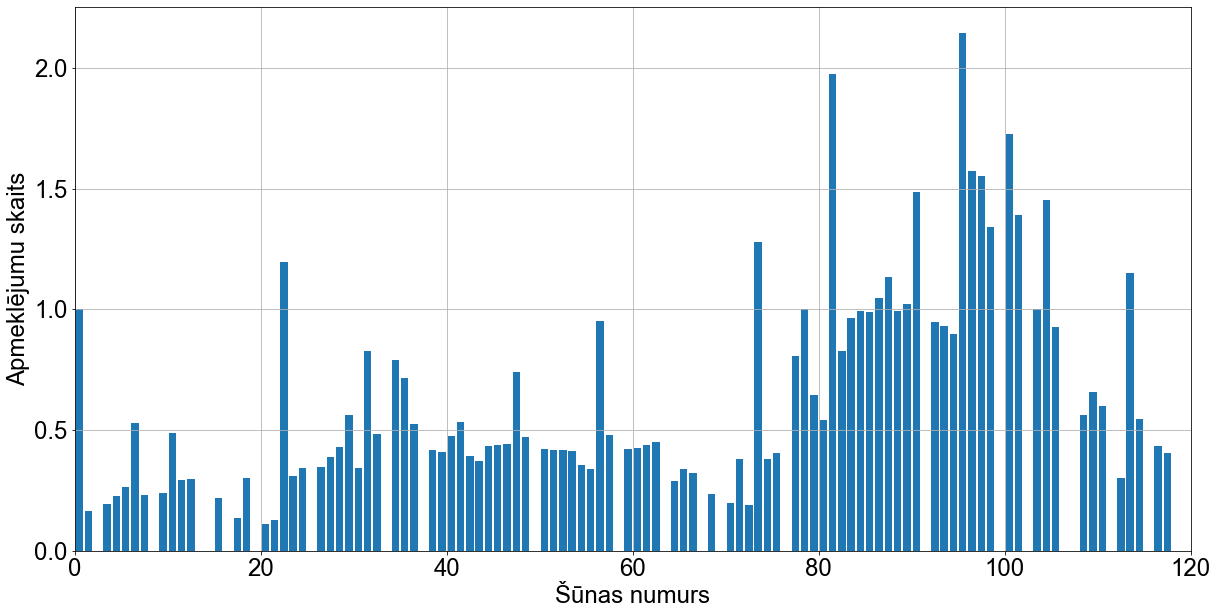

In [298]:
# vidējais lauciņu apmeklējumu skaits pirms sasniedz finišu
fig, ax=plt.subplots(figsize=(20,10))
ax.bar(x=np.arange(n_cells-1)+0.5,height=np.where(nv[0]>0,nv[0],np.nan), ls='none')
ax.grid()
ax.set_xlabel('Šūnas numurs')
ax.set_ylabel('Apmeklējumu skaits')
ax.set_xlim(0,n_cells)
fig.savefig('videjais_apmeklejumu_skaits.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Vidējais lēcienu skaits

In [310]:
lecienu_saraksts = np.array(list(df_jumps.itertuples(index=False, name=None)))
lecienu_statistika = {}
for ftype in [1,2,3]:
    visits = results[ftype][1]
    visits_jumps = visits[:,lecienu_saraksts[:,0]]
    stype = Cirks.finish_type_names[ftype]
    lecienu_statistika[stype] = visits_jumps.mean(axis=0)

In [312]:
df_stat = pd.concat([df_jumps+1,pd.DataFrame(lecienu_statistika)], axis=1)
HTML(df_stat.to_html(float_format='%.2f'))

,No,Uz,Atstarošanās,Gaidīšana,Finiša līnija
0,3,19,0.19,0.19,0.19
1,9,11,0.24,0.24,0.24
2,14,30,0.26,0.26,0.26
3,15,7,0.22,0.22,0.22
4,17,36,0.22,0.22,0.22
5,20,42,0.11,0.11,0.11
6,26,35,0.60,0.46,0.35
7,34,97,0.81,0.64,0.51
8,38,57,0.87,0.69,0.56
9,50,32,0.72,0.59,0.48
